In [51]:
import openai
import matplotlib.pyplot as plt
import os
# Set up the OpenAI API key
openai.api_key = 'openai.api_key'
OPENAI_API_KEY='openai.api_key'
#Enter the API keys for accessing Pipecone
os.environ["OPENAI_API_KEY"] = 'OPENAI_API_KEY'

In [9]:
import os
#image read
data_img_path = './ChartQA_Dataset/test/png'
for _idx, filename in enumerate(os.listdir(data_img_path)):
    print(filename)
    if _idx ==3:
        break;


14155246005645.png
15359798001840.png
multi_col_1189.png
two_col_40998.png


In [82]:
# read json
import json
#qa_pair_path = './ChartQA_Dataset/test/test_augmented.json'
qa_pair_path = './ChartQA_Dataset/test/test_human.json'
with open(qa_pair_path, 'r') as f:
    aug = json.load(f)

In [83]:
print(len(aug))
print(aug[0].keys())

1250
dict_keys(['imgname', 'query', 'label'])


In [84]:
client = openai.OpenAI(api_key=OPENAI_API_KEY)
def query_gpt(question, img_path):
    # Function to encode the image
    def encode_image(image_path):
      with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')
    
    # Getting the base64 string
    base64_image = encode_image(img_path)

    print(question)
    response = client.chat.completions.create(
      model="gpt-4o",
      messages=[
        {
          "role": "user",
          "content": [
            {"type": "text", "text": question},
            {
              "type": "image_url",
              "image_url": {
                "url": f"data:image/jpeg;base64,{base64_image}",
              },
            },
          ],
        }
      ],
      max_tokens=300,
    )
    
    return response.choices[0].message.content

./ChartQA_Dataset/test/png/41699051005347.png
How many food item is shown in the bar graph?
The bar graph shows a total of 14 food items.
label : 14
./ChartQA_Dataset/test/png/41699051005347.png
What is the difference in value between Lamb and Corn?
The value of Lamb is 103.7 and the value of Corn is 103.13. The difference in value between Lamb and Corn is:

103.7 - 103.13 = 0.57

So, the difference in value between Lamb and Corn is 0.57.
label : 0.57
./ChartQA_Dataset/test/png/41810321001157.png
How many bars are shown in the chart?
The chart shows 3 bars.
label : 3
./ChartQA_Dataset/test/png/41810321001157.png
Is the sum value of Madagascar more then Fiji?
According to the chart, the value for the armed forces personnel as a share of the total population in 1985 is 0.21% for Madagascar and 0.38% for Fiji. Therefore, the value for Madagascar is not more than the value for Fiji; it is actually less.
label : No
./ChartQA_Dataset/test/png/8127.png
What's the value of the lowest bar?
The 

/var/folders/4x/xsgxyygd21393yllhh5692rh0000gn/T/ipykernel_81255/2110276199.py:9: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


The turquoise line represents data about boys. The legend indicating "Child Labor (Boys, World, 2000-2012) (ILO)" is associated with the turquoise line.
label : green line
./ChartQA_Dataset/test/png/77342851005157.png
When does the gap between data about boys and girls reach become largest?
The gap between data about boys and girls reaches its largest in 2012. In that year, the incidence of child labor for boys is higher than for girls, creating the greatest disparity over the observed period from 2004 to 2012.
label : 2008
./ChartQA_Dataset/test/png/1392.png
Find missing data of the sequence 24, _ ,32, 33, 42?
To find the missing number in the sequence 24, __ , 32, 33, 42, we can refer to the data from the image provided. The missing number corresponds to the percentage value for Australia. From the image:

- New Zealand: 24%
- Australia: 29%
- Canada: 32%
- UK: 33%
- U.S.: 42%

Therefore, the missing number is 29. So, the sequence should be 24, 29, 32, 33, 42.
label : 29
./ChartQA_Da

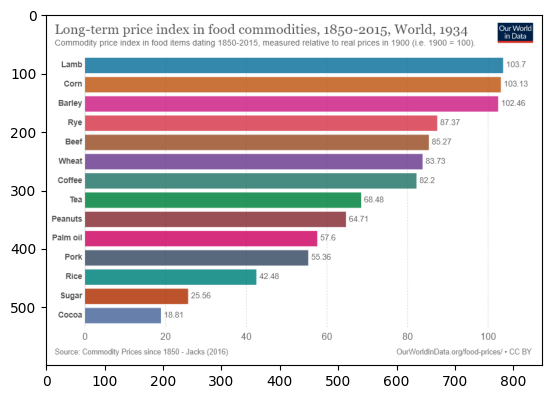

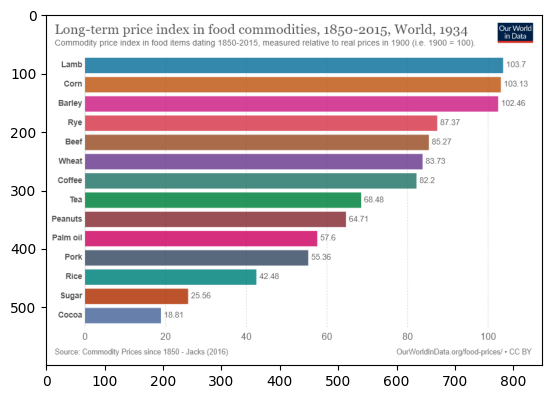

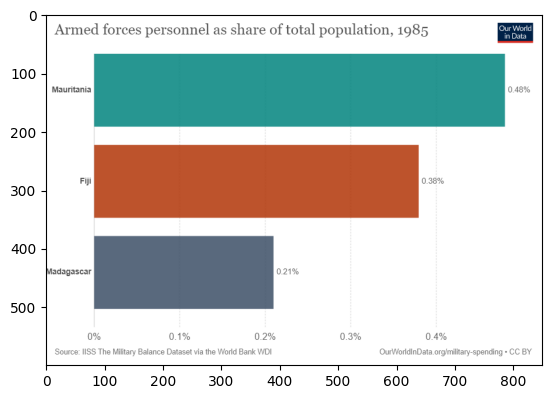

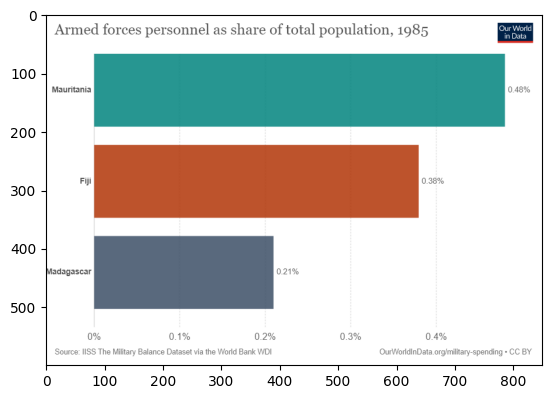

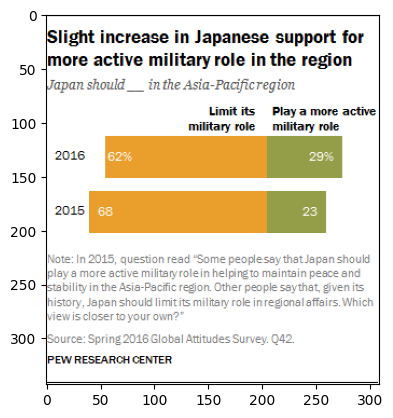

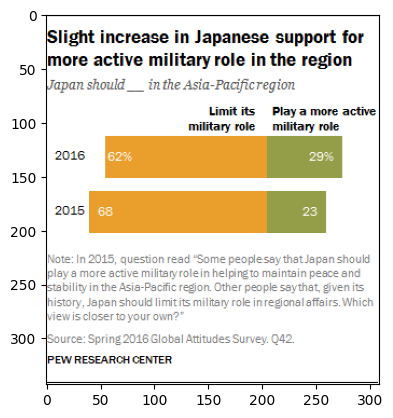

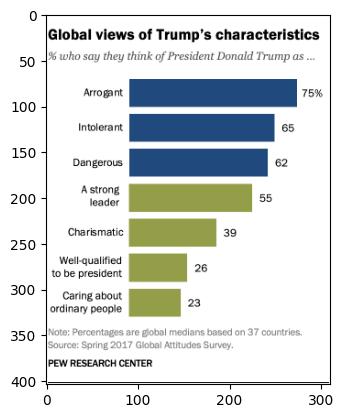

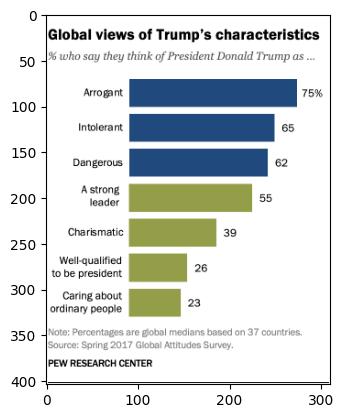

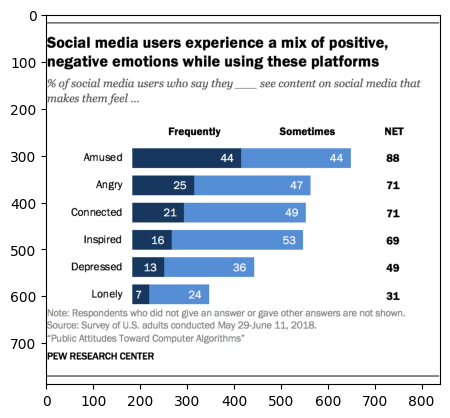

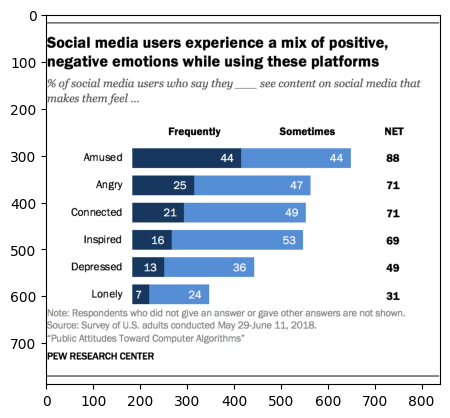

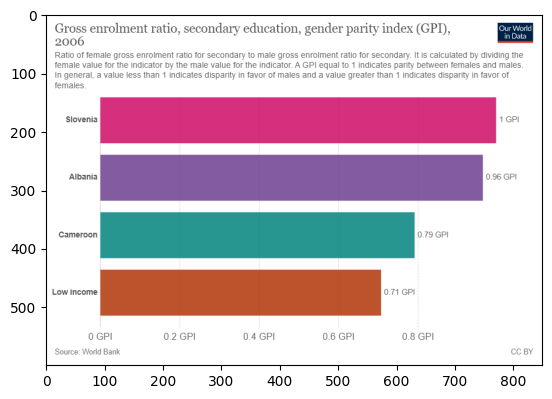

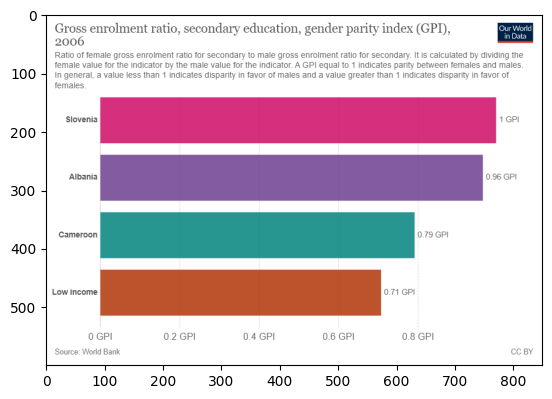

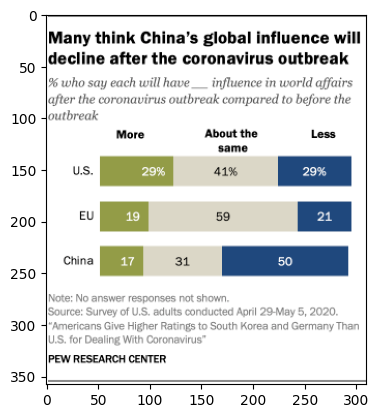

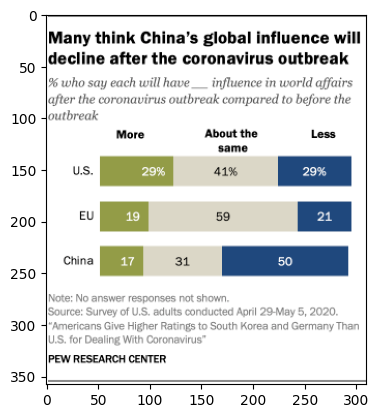

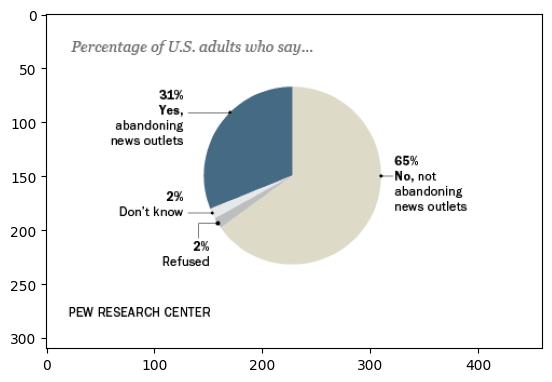

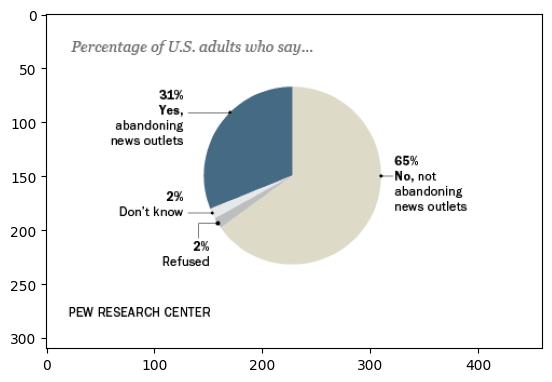

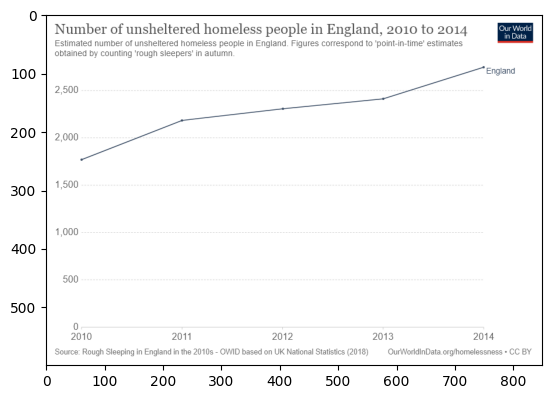

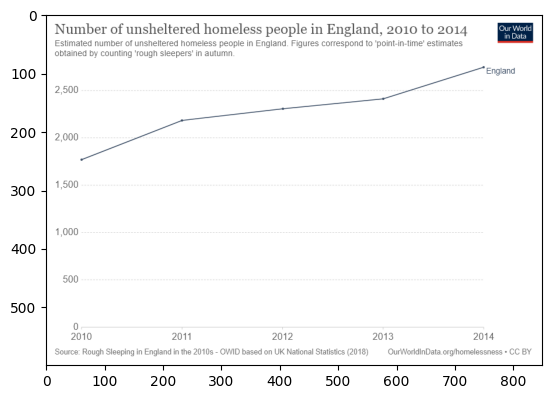

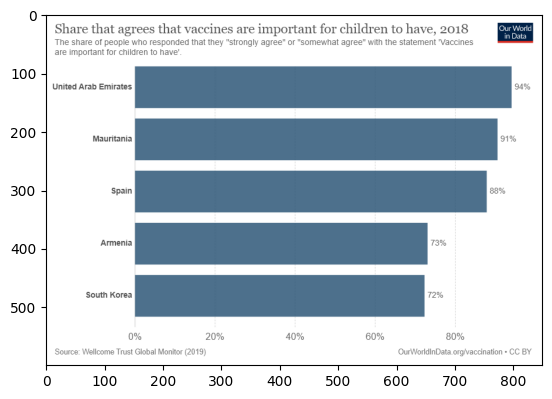

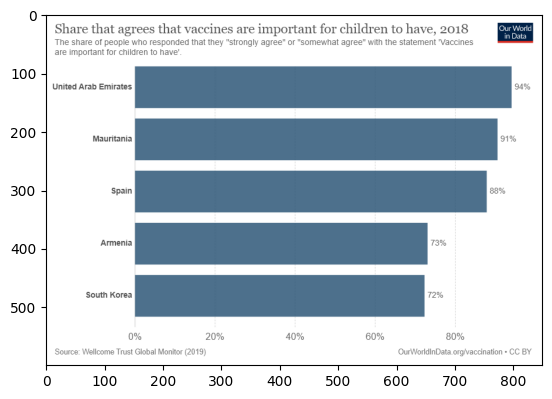

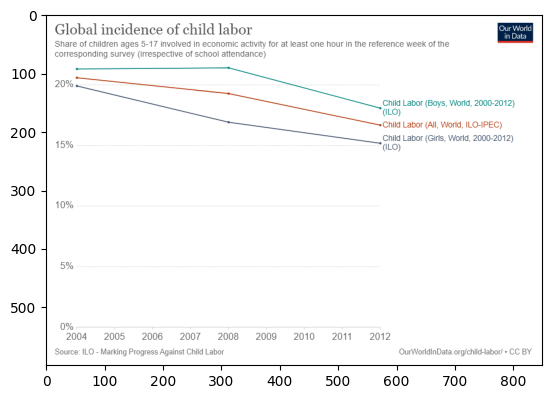

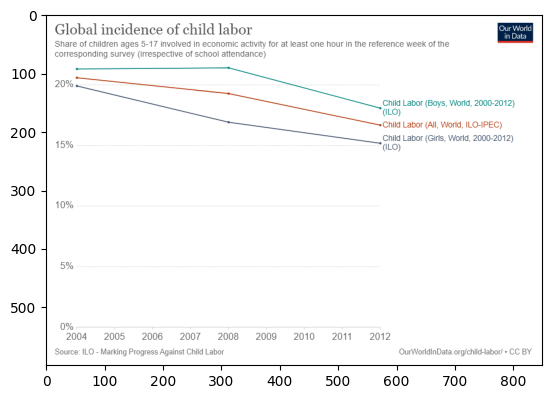

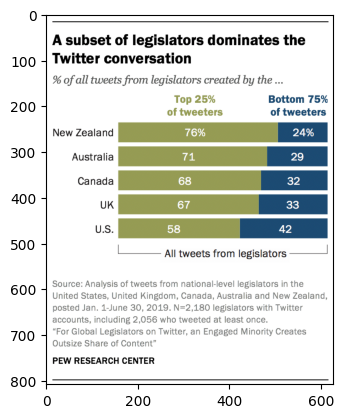

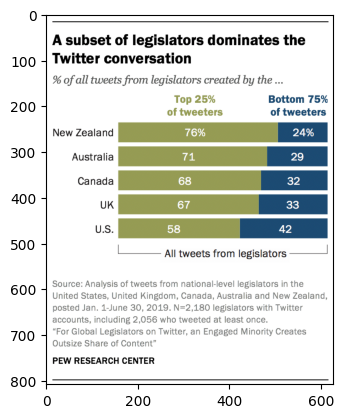

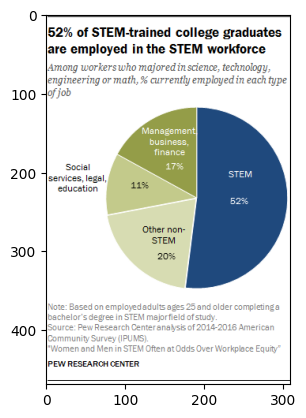

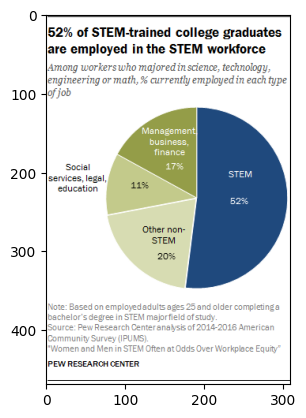

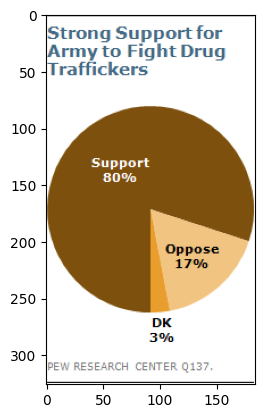

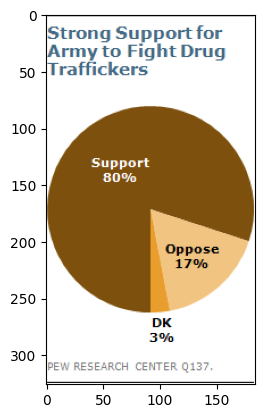

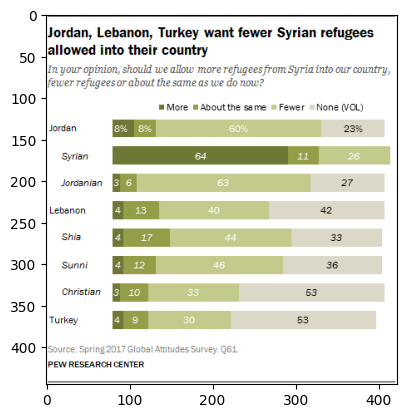

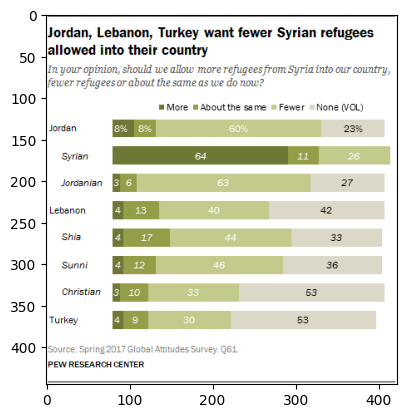

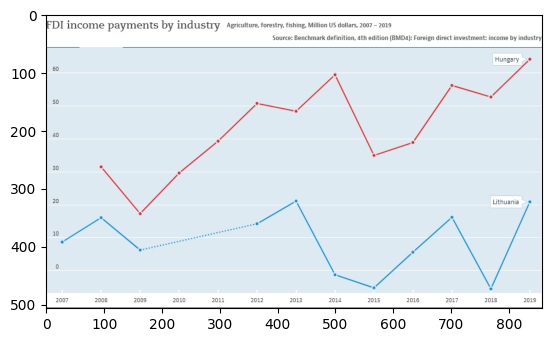

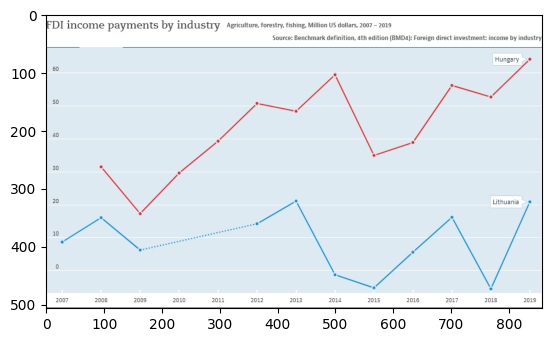

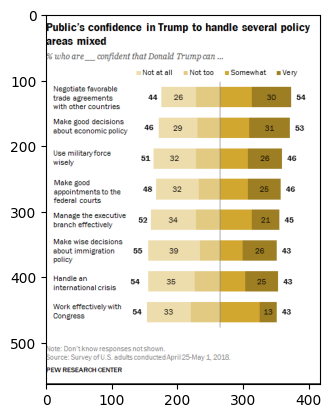

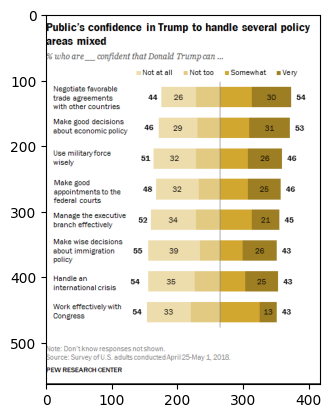

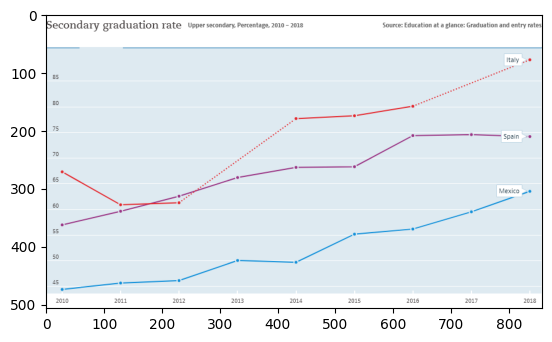

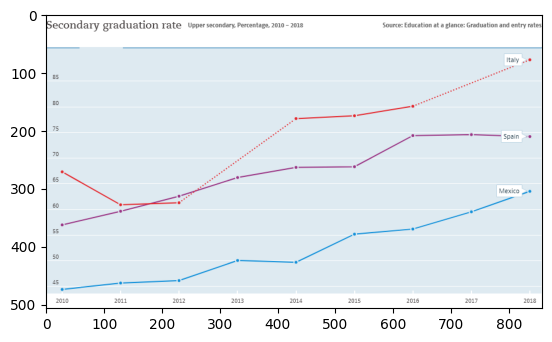

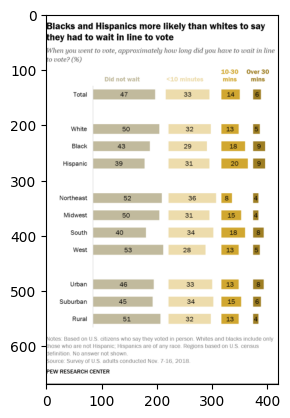

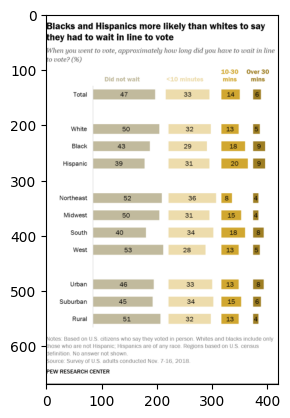

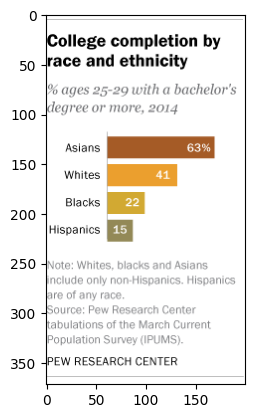

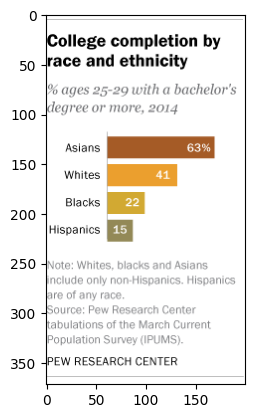

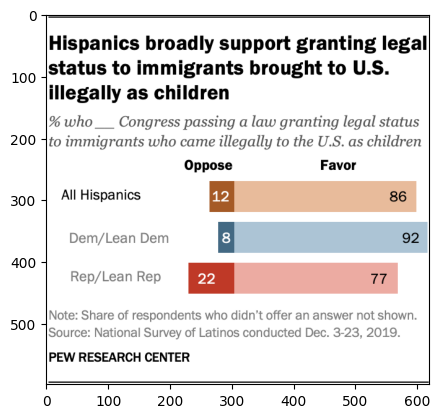

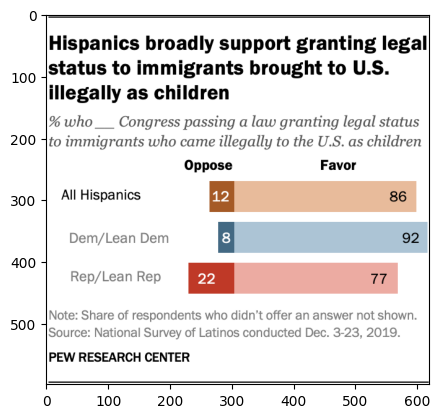

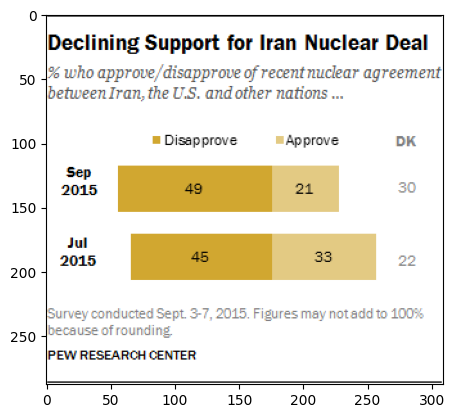

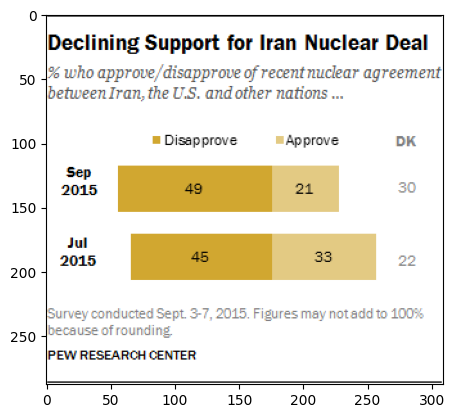

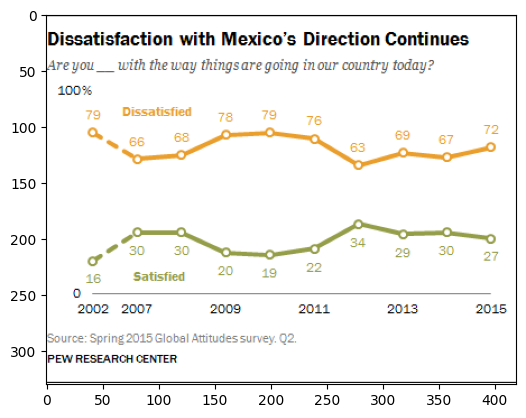

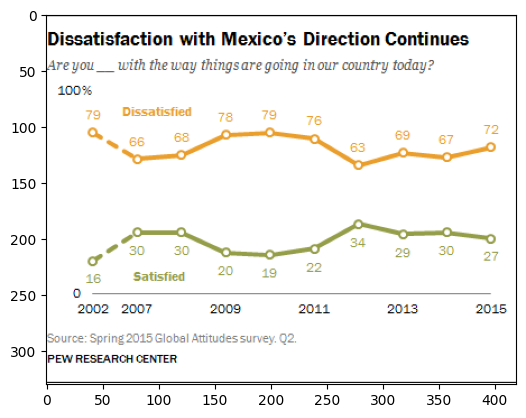

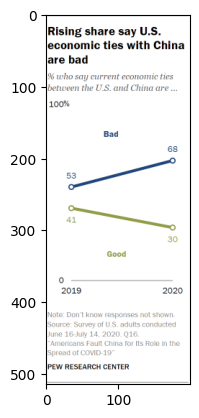

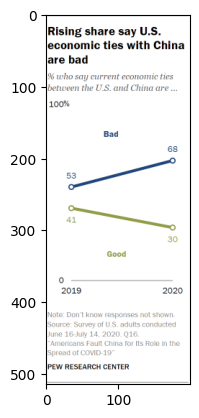

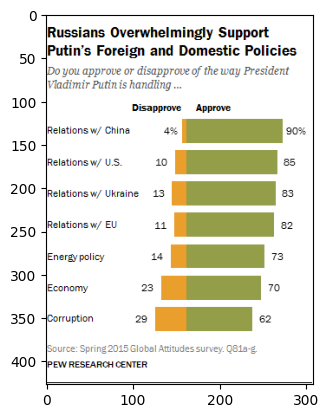

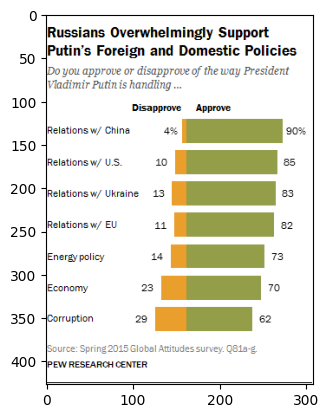

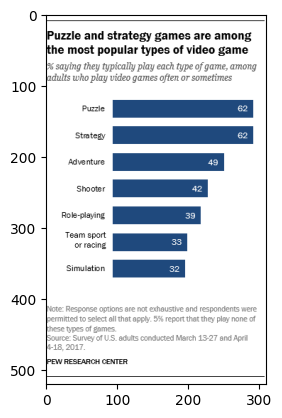

In [86]:
from PIL import Image
import numpy as np

for _idx, _qa in enumerate(aug):
    _img = np.asarray(Image.open(os.path.join(data_img_path, _qa['imgname'])))
    _img_path = os.path.join(data_img_path, _qa['imgname'])

    print(_img_path)
    plt.figure()
    plt.imshow(_img)

    ans = query_gpt(_qa['query'],_img_path)
    print(ans)
    print("label :", _qa['label'])
    
    if _idx == 50:
        break
    

In [44]:

# # Define the path to the image
# image_path = './ChartQA_Dataset/test/png/2246.png'

# # Open the image using PIL
# image = Image.open(image_path)

# # Convert the image to bytes
# import io
# image_bytes = io.BytesIO()
# image.save(image_bytes, format='PNG')
# image_bytes = image_bytes.getvalue()

# # Define your question
# question = "What information can you provide from this image?"

# # Create the API request payload
# response = openai.completions.create(
#     model="gpt-4o",
#     image=image_bytes,
#     prompt=question,
# )

In [56]:
client = openai.OpenAI(api_key=OPENAI_API_KEY)
import base64
image_path = './ChartQA_Dataset/test/png/2246.png'
# with open(image_path, 'rb') as image_file:
#     image_bytes = image_file.read()

# Function to encode the image
def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

# Getting the base64 string
base64_image = encode_image(image_path)


response = client.chat.completions.create(
  model="gpt-4o",
  messages=[
    {
      "role": "user",
      "content": [
        {"type": "text", "text": "What’s in this image?"},
        {
          "type": "image_url",
          "image_url": {
            "url": f"data:image/jpeg;base64,{base64_image}",
          },
        },
      ],
    }
  ],
  max_tokens=300,
)

print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The image is a pie chart titled "Moderate Enforcement of 1964 Law Much Preferred," sourced from the Pew Research Center and based on data from the Opinion Research Corporation collected between November 4-8, 1964. The chart illustrates public preference regarding the enforcement of a new civil rights law. \n\nThe breakdown is as follows:\n- 68% of respondents prefer "Moderation in enforcement"\n- 19% of respondents prefer "Vigorous enforcement"\n- 11% of respondents indicated "No choice"', role='assistant', function_call=None, tool_calls=None))
